# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict laptop prices using the provided `laptops.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict laptop prices.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [675]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [676]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [677]:
def hash_columns(columns):
    col_str = ",".join(sorted(columns))
    return hashlib.sha256(col_str.encode()).hexdigest()

In [678]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [679]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [680]:
df = pd.read_csv("laptops.csv")

In [681]:
df.head()

,Unnamed: 0,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00
1,1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90
4,4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99


In [682]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    return df.describe()

In [683]:
calculate_descriptive_statistics(df)

,Unnamed: 0,Dimension (in),CPU Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,791.000000,791.000000,791.000000,791.000000,691.000000,791.000000
mean,395.000000,15.287611,2.388369,8.601770,2.151999,1113.184956
std,228.486323,1.224031,0.371062,5.173638,0.654401,601.993594
min,0.000000,12.500000,1.200000,4.000000,0.910000,339.000000
25%,197.500000,14.000000,2.000000,4.000000,1.725000,684.995000
50%,395.000000,15.600000,2.500000,8.000000,2.100000,973.000000
75%,592.500000,15.600000,2.700000,8.000000,2.400000,1349.000000
max,790.000000,17.300000,2.900000,64.000000,4.700000,3975.000000


In [684]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    return sns.pairplot(df)

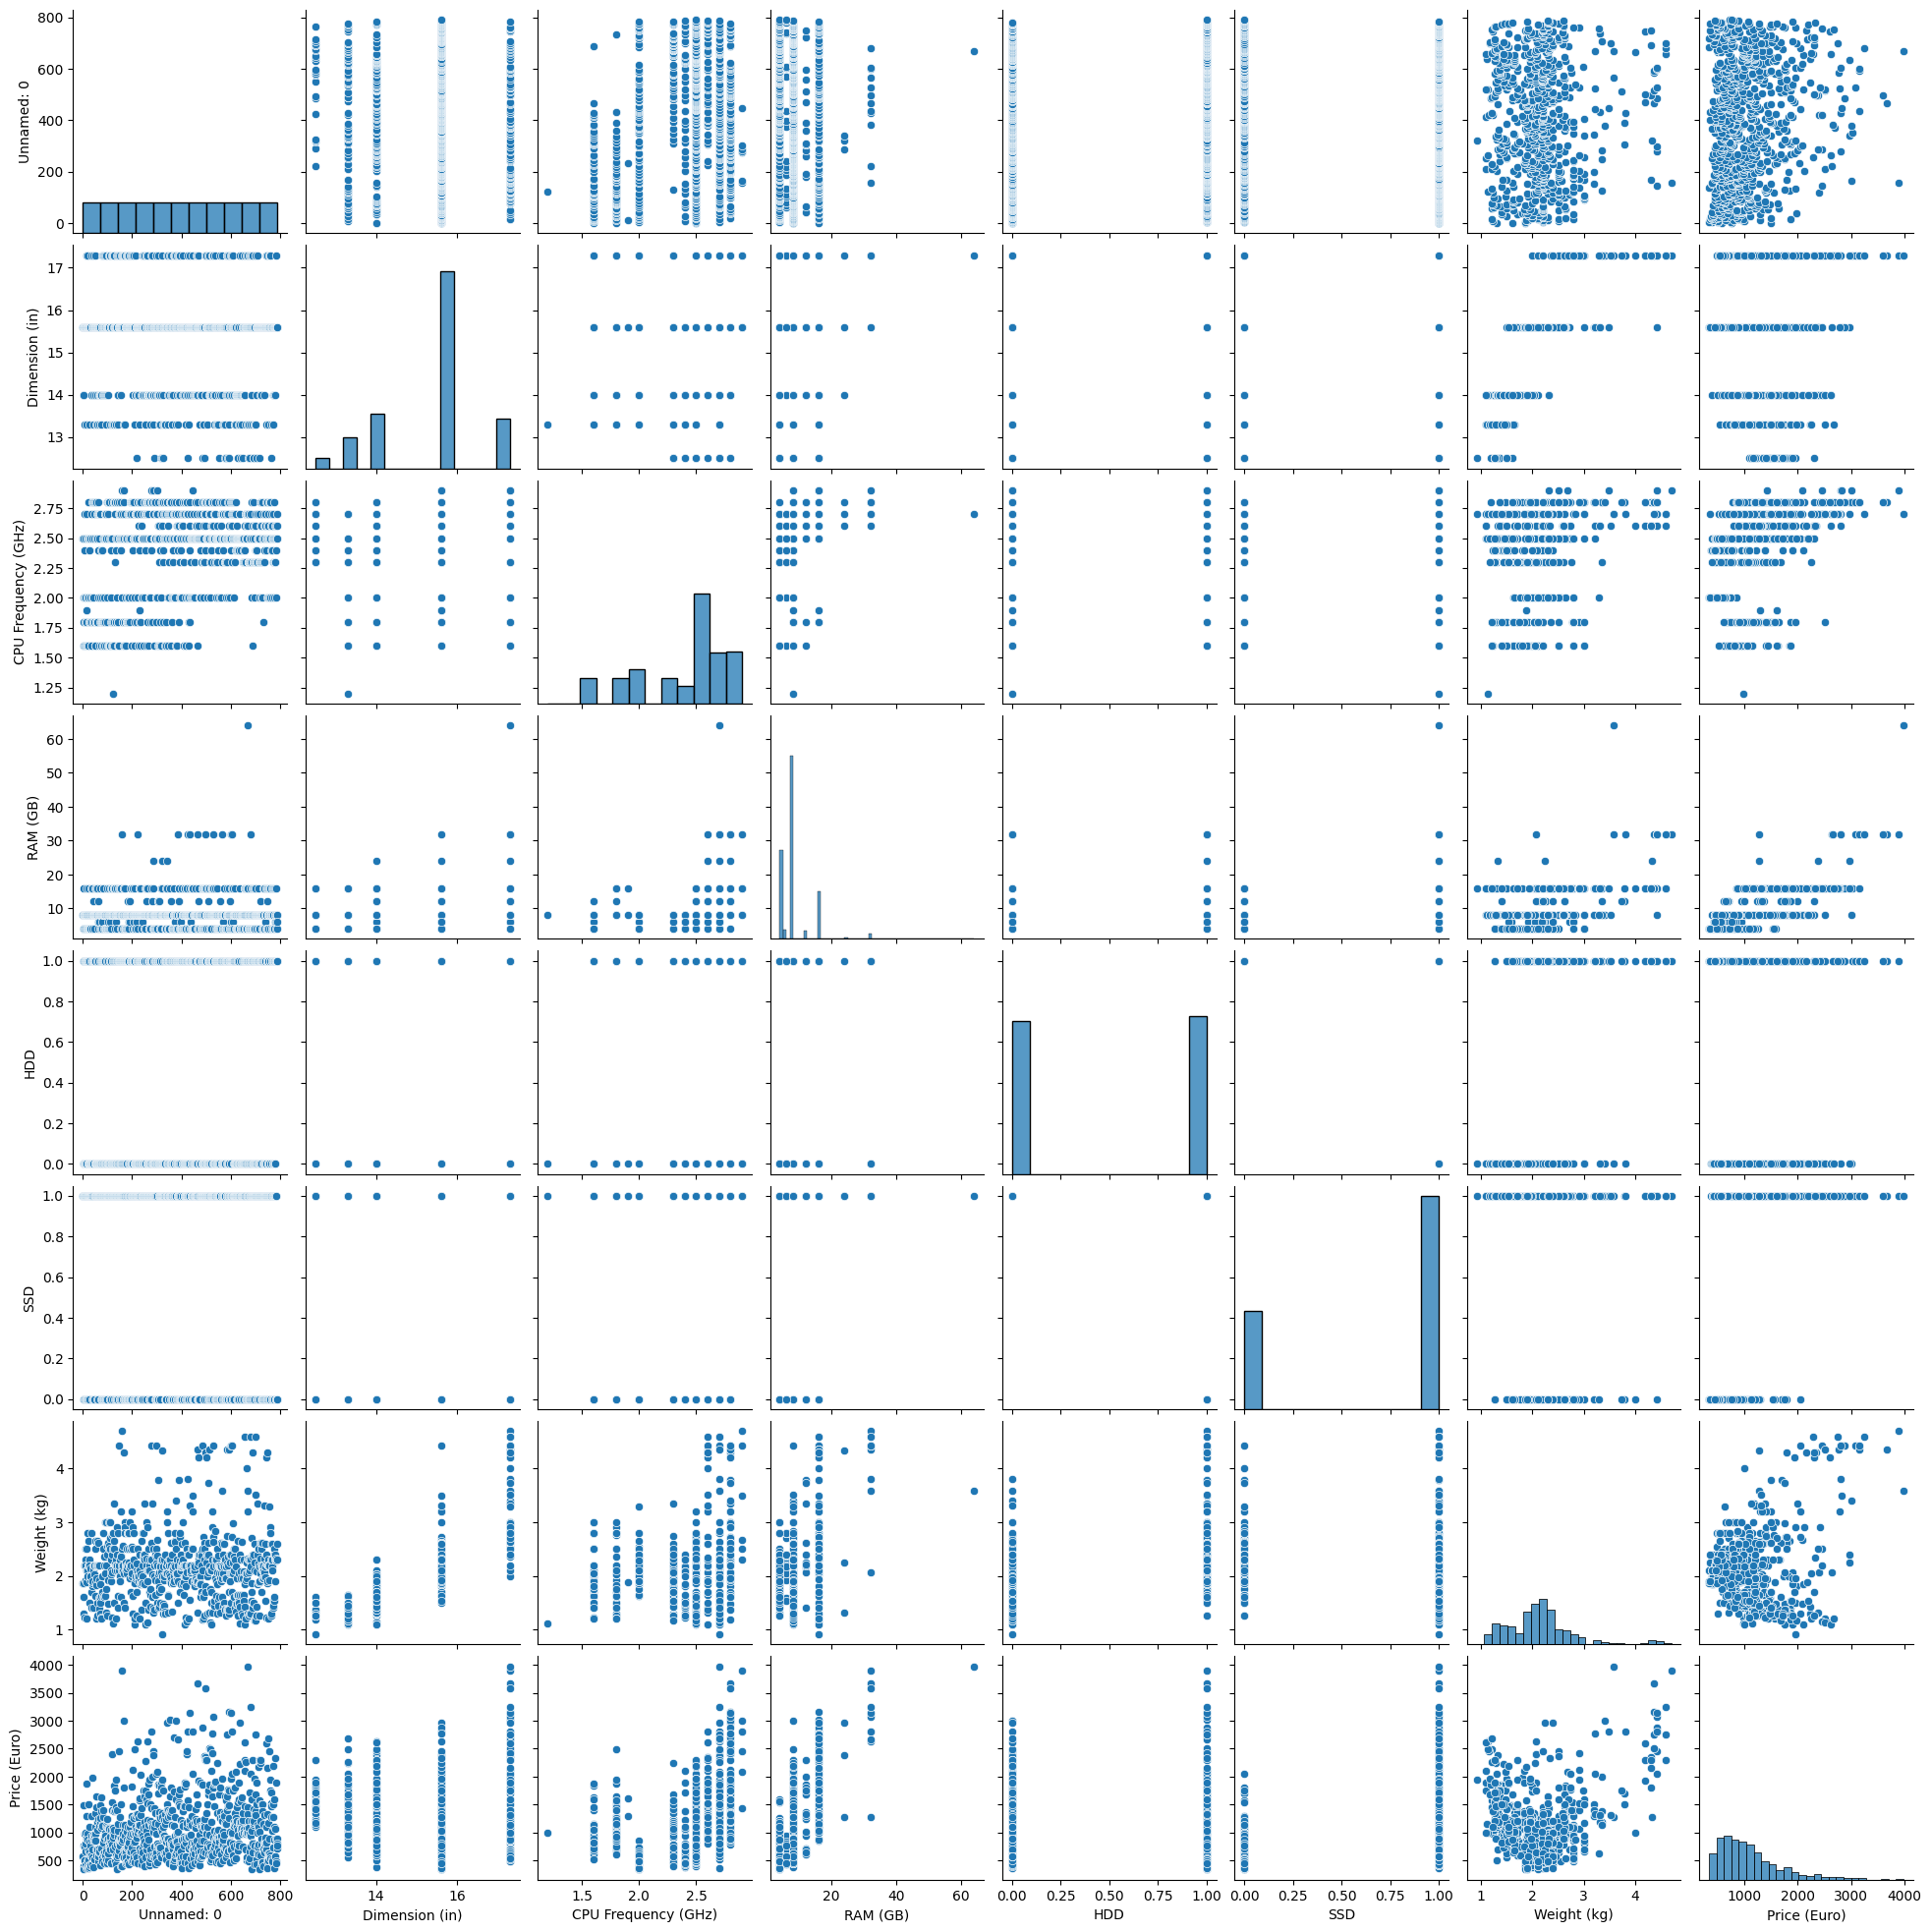

In [685]:
plot_pairwise_relationships(df)

In [686]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

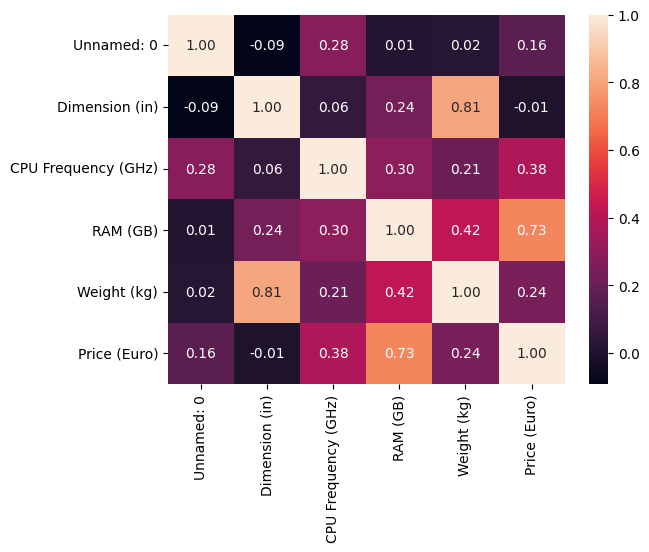

In [687]:
plot_correlation_intensity(df)

In [688]:
### MANUALLY GRADED TASK
def plot_price_distribution_per_type(df):
    """
    Create boxplots to show how laptop prices are distributed across different types.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    sns.boxplot(df, x="Price (Euro)", y="Type")

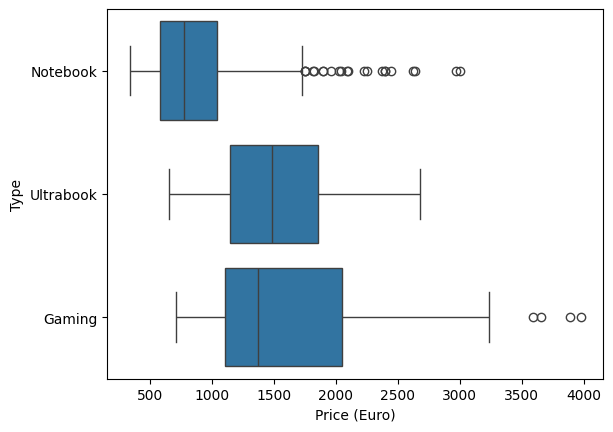

In [689]:
plot_price_distribution_per_type(df)

In [690]:
### MANUALLY GRADED TASK
def plot_laptop_count_per_type(df):
    """
    Create a bar plot showing the number of laptops available for each type.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    counts_per_type = df["Type"].value_counts()
    plt.bar(counts_per_type.index, counts_per_type)
    plt.xticks(rotation=90)
    plt.show()

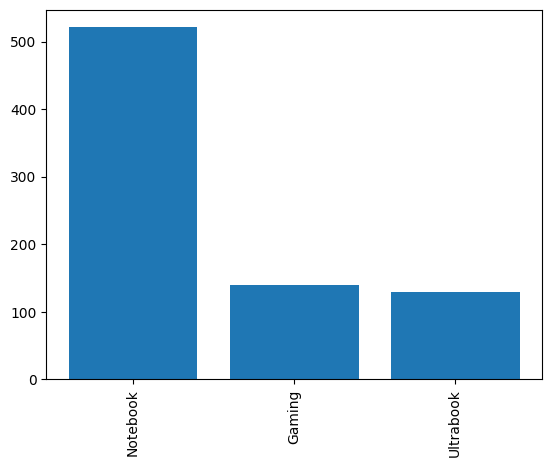

In [691]:
plot_laptop_count_per_type(df)

In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           791 non-null    int64  
 1   Brand                791 non-null    object 
 2   Model                791 non-null    object 
 3   Type                 791 non-null    object 
 4   Dimension (in)       791 non-null    float64
 5   Screen Resolution    791 non-null    object 
 6   CPU Brand            791 non-null    object 
 7   CPU Model            791 non-null    object 
 8   CPU Frequency (GHz)  791 non-null    float64
 9   GPU Brand            791 non-null    object 
 10  GPU Model            791 non-null    object 
 11  RAM (GB)             791 non-null    int64  
 12  HDD                  716 non-null    object 
 13  SSD                  716 non-null    object 
 14  OS                   791 non-null    object 
 15  Weight (kg)          691 non-null    flo

In [693]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Model                    0
Type                     0
Dimension (in)           0
Screen Resolution        0
CPU Brand                0
CPU Model                0
CPU Frequency (GHz)      0
GPU Brand                0
GPU Model                0
RAM (GB)                 0
HDD                     75
SSD                     75
OS                       0
Weight (kg)            100
Price (Euro)             0
dtype: int64

In [694]:
df["Brand"].value_counts()

Brand
Dell      241
Lenovo    197
HP        189
Asus      102
Acer       62
Name: count, dtype: int64

In [695]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_brand(df):
    """
    Encode the `Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["Brand"])
    df = pd.concat([df.drop(columns=["Brand"]), one_hot_encoded_values], axis=1)
    return df

In [696]:
df = encode_or_drop_brand(df)

In [697]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_brand(_df)
assert hash_data_frame(_df) == "69cee123d8c561d45031a409ccf2f856a7594eca08cba1267f8ae6bb919b1c79"

In [698]:
df.head()

,Unnamed: 0,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,...,HDD,SSD,OS,Weight (kg),Price (Euro),Acer,Asus,Dell,HP,Lenovo
0,0,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,...,NaN,True,No OS,1.86,575.00,False,False,False,True,False
1,1,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,...,False,True,Windows,1.30,1495.00,False,True,False,False,False
2,2,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,...,False,True,Windows,1.60,770.00,True,False,False,False,False
3,3,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,...,True,NaN,No OS,1.86,393.90,False,False,False,True,False
4,4,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,...,True,False,No OS,NaN,344.99,False,False,False,True,False


In [699]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_model(df):
    """
    Encode the `Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df = df.drop(columns=["Model"])
    return df

In [700]:
df = encode_or_drop_model(df)

In [701]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "379d9b93ec3a04c36455f8b4f8a3d067e714a445f41725aa475de068e8bc2715"

In [702]:
df["Type"].value_counts()

Type
Notebook     521
Gaming       140
Ultrabook    130
Name: count, dtype: int64

In [703]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_type(df):
    """
    Encode the `Type` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["Type"])
    df = pd.concat([df.drop(columns=["Type"]), one_hot_encoded_values], axis=1)
    
    return df

In [704]:
df = encode_or_drop_type(df)

In [705]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "379d9b93ec3a04c36455f8b4f8a3d067e714a445f41725aa475de068e8bc2715"

In [706]:
### AUTOMATICALLY GRADED TASK
def split_and_cast_screen_resolution(df):
    """
    Split the `Screen Resolution` column into two new integer columns
    `Horizontal Resolution` and `Vertical Resolution`. Add these columns to the dataset
    and remove the original `Screen Resolution` column.

    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df[['Horizontal Resolution', 'Vertical Resolution']] = df['Screen Resolution'].str.split('x', expand=True)
    df['Horizontal Resolution'] = df['Horizontal Resolution'].astype(int)
    df['Vertical Resolution'] = df['Vertical Resolution'].astype(int)
    df = df.drop(columns=['Screen Resolution'])
    
    return df

In [707]:
df = split_and_cast_screen_resolution(df)

In [708]:
_df = pd.read_csv("laptops.csv")
_df = split_and_cast_screen_resolution(_df)
assert hash_data_frame(_df) == "65a69bc7341f682ed2f6b72fe0ebb243bd0571a2eea34a72bba47cc5180b8da3"

In [709]:
df["CPU Brand"].value_counts()

CPU Brand
Intel    791
Name: count, dtype: int64

In [710]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_brand(df):
    """
    Encode the `CPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df = df.drop(columns=["CPU Brand"])
    
    return df

In [711]:
df = encode_or_drop_cpu_brand(df)

In [712]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_brand(_df)
hash_data_frame(_df)
assert hash_data_frame(_df) == "678c5f197ea46849892d54978387346be16bf22300c9023711bfcc6ea839b4aa"

In [713]:
df["CPU Model"].value_counts()

CPU Model
Core i5 7200U     154
Core i7 7700HQ    101
Core i7 7500U      98
Core i3 6006U      80
Core i5 8250U      60
Core i7 8550U      58
Core i5 6200U      45
Core i3 7100U      29
Core i5 7300HQ     27
Core i7 6700HQ     25
Core i7 6500U      24
Core i5 7300U      13
Core i7 6600U      10
Core i5 6300U       9
Core i3 6100U       8
Core i3 7130U       8
Core i7 7600U       8
Core i7 6820HK      7
Core i5 6300HQ      7
Core i7 7820HK      4
Core i5 7440HQ      4
Core i7 7820HQ      3
Core i7 8650U       2
Core i7 7560U       2
Core i7 6820HQ      2
Core i5 7500U       1
Core i5 7Y54        1
Core i7 7660U       1
Name: count, dtype: int64

In [714]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_model(df):
    """
    Encode the `CPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df = df.drop(columns=["CPU Model"])
    
    return df

In [715]:
df = encode_or_drop_cpu_model(df)

In [716]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_model(_df)
assert hash_data_frame(_df) == "6057aa14ac0c0ff8a11dc7dbfbc5924f091bf541fb4777649ba773e83fc6ac8c"

In [717]:
df["GPU Brand"].value_counts()

GPU Brand
Intel     398
Nvidia    287
AMD       106
Name: count, dtype: int64

In [718]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_brand(df):
    """
    Encode the `GPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["GPU Brand"])
    df = pd.concat([df.drop(columns=["GPU Brand"]), one_hot_encoded_values], axis=1)
    
    return df

In [719]:
df = encode_or_drop_gpu_brand(df)

In [720]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_brand(_df)
assert hash_data_frame(_df) == "40ab9cf1ea1f9d4e85a0221ffd128a3c850db72f20d427196ee1db253826d6c5"

In [721]:
df["GPU Model"].value_counts()

GPU Model
HD Graphics 620     205
HD Graphics 520     135
GeForce GTX 1050     52
UHD Graphics 620     46
GeForce 940MX        37
                   ... 
Quadro 3000M          1
Radeon R5 M315        1
Radeon R7 M360        1
GeForce 960M          1
Radeon R7 M440        1
Name: count, Length: 64, dtype: int64

In [722]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_model(df):
    """
    Encode the `GPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df = df.drop(columns=["GPU Model"])
    return df

In [723]:
df = encode_or_drop_gpu_model(df)

In [724]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_model(_df)
assert hash_data_frame(_df) == "eb863409d582b92a52b8e9860988129cdf8df702290531e55503d8ed3dcf0928"

In [725]:
df["OS"].value_counts()

OS
Windows    689
No OS       53
Linux       49
Name: count, dtype: int64

In [726]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_os(df):
    """
    Encode the `OS` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    one_hot_encoded_values = pd.get_dummies(df["OS"])
    df = pd.concat([df.drop(columns=["OS"]), one_hot_encoded_values], axis=1)
    return df

In [727]:
df = encode_or_drop_os(df)

In [728]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_os(_df)
assert hash_data_frame(_df) == "4ae192a83b2e9e626d022c4d7b086407f94f202f6301cf22972ed1f6d2b9788c"

In [729]:
df.isnull().sum()

Unnamed: 0                 0
Dimension (in)             0
CPU Frequency (GHz)        0
RAM (GB)                   0
HDD                       75
SSD                       75
Weight (kg)              100
Price (Euro)               0
Acer                       0
Asus                       0
Dell                       0
HP                         0
Lenovo                     0
Gaming                     0
Notebook                   0
Ultrabook                  0
Horizontal Resolution      0
Vertical Resolution        0
AMD                        0
Intel                      0
Nvidia                     0
Linux                      0
No OS                      0
Windows                    0
dtype: int64

In [730]:
df.head(10)

,Unnamed: 0,Dimension (in),CPU Frequency (GHz),RAM (GB),HDD,SSD,Weight (kg),Price (Euro),Acer,Asus,...,Notebook,Ultrabook,Horizontal Resolution,Vertical Resolution,AMD,Intel,Nvidia,Linux,No OS,Windows
0,0,15.6,2.5,8,NaN,True,1.86,575.00,False,False,...,True,False,1920,1080,False,True,False,False,True,False
1,1,14.0,1.8,16,False,True,1.30,1495.00,False,True,...,False,True,1920,1080,False,False,True,False,False,True
2,2,14.0,1.6,8,False,True,1.60,770.00,True,False,...,False,True,1920,1080,False,True,False,False,False,True
3,3,15.6,2.5,4,True,NaN,1.86,393.90,False,False,...,True,False,1366,768,False,True,False,False,True,False
4,4,15.6,2.0,4,True,False,NaN,344.99,False,False,...,True,False,1920,1080,False,True,False,False,True,False
5,5,15.6,2.0,4,False,True,2.20,498.90,False,False,...,True,False,1920,1080,True,False,False,False,False,True
6,6,15.6,2.7,8,False,True,NaN,745.00,False,False,...,True,False,1920,1080,True,False,False,False,False,True
7,7,15.6,2.4,8,True,False,2.20,499.00,False,False,...,True,False,1920,1080,False,False,True,False,True,False
8,8,13.3,1.6,8,False,True,1.22,979.00,False,False,...,False,True,1920,1080,False,True,False,False,False,True
9,9,15.6,2.5,8,True,True,2.50,999.00,False,False,...,False,False,1920,1080,False,False,True,False,False,True


In [731]:
print(df['HDD'].dtype)

object


In [732]:
df["HDD"].value_counts()

HDD
True     363
False    353
Name: count, dtype: int64

In [733]:
### AUTOMATICALLY GRADED TASK
def impute_hdd_and_ssd(df):
    """
    Fill in missing values in the `HDD` and `SSD` columns.

    Return the updated dataset as a `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    df['SSD']=df['SSD'].fillna(0)
    df['HDD']=df['HDD'].fillna(0)
    return df

In [734]:
df = impute_hdd_and_ssd(df)

In [735]:
df.isnull().sum()

Unnamed: 0                 0
Dimension (in)             0
CPU Frequency (GHz)        0
RAM (GB)                   0
HDD                        0
SSD                        0
Weight (kg)              100
Price (Euro)               0
Acer                       0
Asus                       0
Dell                       0
HP                         0
Lenovo                     0
Gaming                     0
Notebook                   0
Ultrabook                  0
Horizontal Resolution      0
Vertical Resolution        0
AMD                        0
Intel                      0
Nvidia                     0
Linux                      0
No OS                      0
Windows                    0
dtype: int64

In [736]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_hdd_and_ssd(_df)
assert hash_data_frame(_df) == "59d73ac352611b48100bffb42c45965018a0a3b0516a873fa50d46902aec07d0"

AssertionError: 

In [737]:
df.head()

,Unnamed: 0,Dimension (in),CPU Frequency (GHz),RAM (GB),HDD,SSD,Weight (kg),Price (Euro),Acer,Asus,...,Notebook,Ultrabook,Horizontal Resolution,Vertical Resolution,AMD,Intel,Nvidia,Linux,No OS,Windows
0,0,15.6,2.5,8,0,True,1.86,575.00,False,False,...,True,False,1920,1080,False,True,False,False,True,False
1,1,14.0,1.8,16,False,True,1.30,1495.00,False,True,...,False,True,1920,1080,False,False,True,False,False,True
2,2,14.0,1.6,8,False,True,1.60,770.00,True,False,...,False,True,1920,1080,False,True,False,False,False,True
3,3,15.6,2.5,4,True,0,1.86,393.90,False,False,...,True,False,1366,768,False,True,False,False,True,False
4,4,15.6,2.0,4,True,False,NaN,344.99,False,False,...,True,False,1920,1080,False,True,False,False,True,False


<Axes: ylabel='Frequency'>

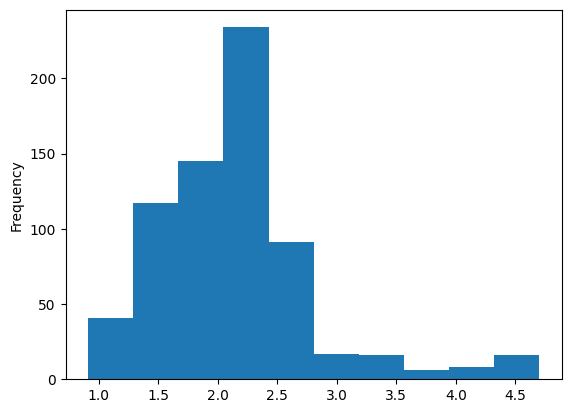

In [738]:
df["Weight (kg)"].plot.hist()

In [739]:
df["Weight (kg)"].describe()


count    691.000000
mean       2.151999
std        0.654401
min        0.910000
25%        1.725000
50%        2.100000
75%        2.400000
max        4.700000
Name: Weight (kg), dtype: float64

In [740]:
### AUTOMATICALLY GRADED TASK
def impute_weight(df):
    """
    Fill in missing values in the `Weight (kg)` column.

    Return the updated dataset as a `pd.DataFrame`.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()
    median_imputer = SimpleImputer(strategy="median")
    df[["Weight (kg)"]] = median_imputer.fit_transform(df[["Weight (kg)"]])
    
    return df

In [741]:
df = impute_weight(df)

In [742]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_weight(_df)
assert hash_data_frame(_df) == "0d2dd598ce554853e750f5d063e232a1ce9706ce7a18bd4c20927cda61db1d80"

AssertionError: 

In [743]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """

    # YOUR CODE HERE
   # raise NotImplementedError()
    X, y = df.drop(columns=["Price (Euro)"]), df["Price (Euro)"]
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    
    return train_X, test_X, train_y, test_y

In [744]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [745]:
_df = pd.read_csv("laptops.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "bca71f08765291b0ea184ad145148263b5bb37e971bd76e63858d312fff4eb7a"
assert hash_data_frame(_test_X) == "cbc86f504695c5ad50d675c468bd4b504c8655493292318961950fb42c0b6df7"
assert hash_series(_train_y) == "314cbe0e97f0eade41a16b7ace6d97563f05a194f613947b3fc517b74472cf0a"
assert hash_series(_test_y) == "9211c8582f77328da6cfb22a0411523225a83f2bf4be9fabc60e97ab717c7601"

In [746]:
### AUTOMATICALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a Lasso (L1-regularized) linear regression model with cross-validation.
    - Use `alphas=[0.001, 0.01, 0.1, 1.0, 10.0]`.
    - Perform 10-fold cross-validation to select the best `alpha`.

    Return the trained model.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=10,random_state=RANDOM_STATE).fit(train_X, train_y)
    
    return model

In [747]:
print(type(train_y))

<class 'pandas.core.series.Series'>


In [748]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1)).reshape(-1)

In [749]:
model = fit_model(train_X, train_y)

In [750]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "CPU Frequency (GHz)", "RAM (GB)"]], _df["Price (Euro)"])
assert _model.alpha_.item() == 0.1
assert _model.coef_.tolist() == [-91.56114924644716, 286.1822635451678, 83.43876092424881]
assert _model.intercept_ == 1111.706239752898

AssertionError: 

In [751]:
print(f"  Mine:     {_model.coef_.tolist()}")

  Mine:     [-91.56114924644716, 286.18226354516787, 83.43876092424883]


In [752]:
pred_y = model.predict(test_X)

In [753]:
pred_y = scaler.inverse_transform(pred_y.reshape(-1, 1)).reshape(-1)

In [754]:
### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """

    # YOUR CODE HERE
    print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
    print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
    print(f"MSE: {mean_squared_error(test_y, pred_y)}")
    print(f"MSE: {root_mean_squared_error(test_y, pred_y)}")
    print(f"R2 Score: {r2_score(test_y, pred_y)}")
    #raise NotImplementedError()

In [755]:
evaluate_model(test_y, pred_y)

MAE: 228.6241294155238
MAPE: 0.22067524928002952
MSE: 102188.10692249816
MSE: 319.66874561410935
R2 Score: 0.6499161470526109


In [756]:
### AUTOMATICALLY GRADED TASK
def perform_feature_selection(model, train_X, test_X):
    """
    Select features based on the trained model.
    Keep only the selected features in both training and test sets.

    Return the updated train_X and test_X.
    """

    # YOUR CODE HERE
    #raise NotImplementedError()

    selected_columns = train_X.columns[model.coef_ != 0]
    train_X = train_X[selected_columns]
    test_X = test_X[selected_columns]
    
    return train_X, test_X 

In [757]:
train_X, test_X = perform_feature_selection(model, train_X, test_X)

In [758]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "RAM (GB)"]][:500], _df["CPU Frequency (GHz)"][:500])
_train_X, _test_X = perform_feature_selection(_model, _df[["Dimension (in)", "RAM (GB)"]][:500], _df[["Dimension (in)", "RAM (GB)"]][500:])
assert hash_data_frame(_train_X) == "4610875da9717f5758faeccc5dec8e6555bc18967aaa058ad1b2b8b503101b57"
assert hash_data_frame(_test_X) == "a429556e734d7d17615e856fced0de8943c7914f54797d316c9c44e4d1144052"